# Redes Neuronales - Modelo MultiCapa

El __algoritmo de retropropagación que permite entrenar una red multicapa__ se introduce en 1970, pero no es hasta 1986 con el artículo de {cite:p}`rumelhart1986learning` cuando se aprecia su potencial. Permitiendo, por ejemplo, clasificar conjuntos donde las clases no están linealmente separadas. 

In [1]:
import pandas as pd
from IPython import display
import numpy as np
import matplotlib.pyplot as plt

## Estructura general del modelo

### Definición de la red de un Perceptrón Multicapa o Redes densas

Se dispone de un conjunto de capas $\{0,..., l, ..., L\}$ donde __0__ es la capa de entrada, __L__ la de salida y el resto de capas $0<l<L$ son las capas intermedias u ocultas. Una capa $l-1$ tiene conectadas todas sus neuronas con cada una de las neuronas de la capa siguiente $l$, por tanto harán falta __L__ matrices de Pesos y Bias para configurar la red:

$$\{W^1, ..., W^l,...,W^L\}; \{B^1, ..., B^l,...,B^L\}$$

_En general bastarán con 1 o 2 capas ocultas para definir un perceptrón_.

<img src="images/RedMultiCapa.png" width="800px">

### Proceso de activación (forward)

El proceso de activación transforma una observación $\vec{x}$ en la probabilidad final de la red. Implica concatenar procesos de ponderación lineal y activación aplicados a la salida de la capa anterior:

$$\bar{z}^l = \begin{pmatrix}B^l\end{pmatrix}^T + \bar{a}^{l-1} \begin{pmatrix}W^l\end{pmatrix}^T$$
$$\bar{a}^l = f \begin{pmatrix} \bar{z}^l \end{pmatrix} $$


Siendo $\bar{a}^{l-1} = \bar{x}$ en la primera capa si $l=1$.

__El proceso matricial de la activación en una red densa multicapa es__:

$$ Z^l =  (B^l)^T \oplus A^{l-1} \cdot (W^l)^T$$

$$A^l= f(Z^l) $$

Sabiendo que si $l=1$ entonces $A^{l-1} = X$


### Proceso de entrenamiento

Las matrices $W^l$ y $B^l$ se entrenan de forma similar al proceso bicapa:

$$W^l[t+1] = W^l[t] - \eta \begin{pmatrix} \bar{\delta}^l  \end{pmatrix}^T \bar{a}^{l-1}$$
$$B^l[t+1] = B^l[t] - \eta \begin{pmatrix} \bar{\delta}^l  \end{pmatrix}^T $$

__Matricialmente el proceso de entrenamiento para N observaciones en el conjunto X es__:

$$W^l[t+1] = W^l[t] - \eta \begin{pmatrix} \Delta^l  \end{pmatrix}^T A^{l-1}$$
$$B^l[t+1] = B^l[t] - \eta \begin{pmatrix} \Delta^l  \end{pmatrix}^T   {\Large  1} $$

__Pero cambia__ la obtención de  $\bar{\delta}^l$ que es necesario calcular primero en $l=L$ y luego ir '_progapando_' hacia atrás. Para justificar de una manera sencilla el proceso de __retropropagación__ se parte de un ejemplo lo más sencillo posible de red multicapa:

<img src="images/RedTriCapa.png" width="700px">

El __superindice__ se utiliza aquí en la notación para identificar la capa del número, vector o matriz. Para no confudir donde se emple un cuadrado aparecerá en negrita y con tamaño mayor.

### Retropropagación (back propagation)

El entrenamiento que produce una observación $\bar{x}=(x_1, x_2)$ en los pesos de la segunda capa conduce a resultados similares a los obtenidos en el modelo bicapa. Para seguir la aplicación de la regla de la cadena las derivadas de la __función de pérdida__

$$C = \frac{1}{2} \begin{bmatrix} (a^2_1 - y_1)^ {\Large \textbf 2} + (a^2_2 - y_2)^ {\Large \textbf 2} \end{bmatrix}$$

se puede seguir hacia atrás el grafo de la red hasta las variables que se está derivando. 

<img src="images/RedTriCapa2.png" width="500px">

Para obtener $\frac{\partial C}{\partial w^2_{11}}$ se sigue el camino amarillo:

$$\frac{\partial C}{\partial w^2_{11}} = \frac{\partial C}{\partial a^2_1} \frac{\partial a^2_1}{\partial z^2_1}\frac{\partial z^2_1}{\partial w^2_{11}} =  (a^2_1 - y_1) f'(z^2_1) a^1_1 = \delta^2_1 a^1_1 $$

De igual forma se obtendría

$$\frac{\partial C}{\partial w^2_{12}} = \delta^2_1 a^1_2 \phantom{abc} \frac{\partial C}{\partial b^2_1} = \delta^2_1$$

Y para obtener $\frac{\partial C}{\partial w^2_{21}}$ se sigue el camino verde:

$$\frac{\partial C}{\partial w^2_{21}} = \frac{\partial C}{\partial a^2_2} \frac{\partial a^2_2}{\partial z^2_2}\frac{\partial z^2_2}{\partial w^2_{21}} =  (a^2_2 - y_2) f'(z^2_2) a^1_1 = \delta^2_2 a^1_1 $$

De igual forma se obtendría

$$\frac{\partial C}{\partial w^2_{22}} = \delta^2_2 a^1_2 \phantom{abc} \frac{\partial C}{\partial b^2_2} = \delta^2_2$$

__Lo que permite obtener los gradientes de la capa 2__:

$$\frac{\partial C}{\partial \bar{z}^2} = \bar{\delta}^2 = (\delta^2_1,\delta^2_2) = (\bar{a}^2 - \bar{y}) \odot f'(\bar{z}^2)$$ 

$$\frac{\partial C}{\partial W^2} = (\bar{\delta}^2)^T \cdot \bar{a}_1$$
$$\frac{\partial C}{\partial B^2} = (\bar{\delta}^2)^T $$

__El entrenamiento de la capa 1__, por ejemplo para optimizar el peso $w^1_{11}$ requiere dos caminos simultáneos (verde y amarillo) como se puede comprobar en el siguiente gráfico:

<img src="images/RedTriCapa3.png" width="700px">


$$\frac{\partial C}{\partial w^1_{11}} = \frac{\partial C}{\partial a^2_1} \frac{\partial a^2_1}{\partial w^1_{11}} +  \frac{\partial C}{\partial a^2_2} \frac{\partial a^2_2}{\partial w^1_{11}} $$

Desarrollando cada uno de los sumandos:


$$ \frac{\partial C}{\partial a^2_1} \frac{\partial a^2_1}{\partial w^1_{11}} = 
 \frac{\partial C}{\partial a^2_1} 
 \frac{\partial a^2_1}{\partial z^2_1}
 \frac{\partial z^2_1}{\partial a^1_1}
 \frac{\partial a^1_1}{\partial z^1_1}
 \frac{\partial z^1_1}{\partial  w^1_{11}} $$

$$ \frac{\partial C}{\partial a^2_2} \frac{\partial a^2_2}{\partial w^1_{11}} = 
 \frac{\partial C}{\partial a^2_2} 
 \frac{\partial a^2_2}{\partial z^2_2}
 \frac{\partial z^2_2}{\partial a^1_1}
 \frac{\partial a^1_1}{\partial z^1_1}
 \frac{\partial z^1_1}{\partial  w^1_{11}} $$

Permite poner:

$$\frac{\partial C}{\partial w^1_{11}} = \delta^2_1 w^2_{11} f'(z^1_1) x_1 + \delta^2_2 w^2_{21} f'(z^1_1) x_1 = 
(\delta^2_1 w^2_{11} + \delta^2_2 w^2_{21}) f'(z^1_1)  x_1 = \delta^1_1 x_1$$

De igual forma se tiene:

$$\frac{\partial C}{\partial w^1_{12}} = \delta^1_1 x_2 \phantom{abc}  \frac{\partial C}{\partial b^1_1} = \delta^1_1$$

__Para optimizar el peso__ $w^1_{21}$ requiere también dos caminos simultáneos (verde y amarillo) como se puede comprobar en el siguiente gráfico:

<img src="images/RedTriCapa4.png" width="700px">


$$\frac{\partial C}{\partial w^1_{21}} = \frac{\partial C}{\partial a^2_1} \frac{\partial a^2_1}{\partial w^1_{21}} +  \frac{\partial C}{\partial a^2_2} \frac{\partial a^2_2}{\partial w^1_{21}} $$

Desarrollando cada uno de los sumandos:


$$ \frac{\partial C}{\partial a^2_1} \frac{\partial a^2_1}{\partial w^1_{21}} = 
 \frac{\partial C}{\partial a^2_1} 
 \frac{\partial a^2_1}{\partial z^2_1}
 \frac{\partial z^2_1}{\partial a^1_2}
 \frac{\partial a^1_2}{\partial z^1_2}
 \frac{\partial z^1_2}{\partial  w^1_{21}} $$

$$ \frac{\partial C}{\partial a^2_2} \frac{\partial a^2_2}{\partial w^1_{21}} = 
 \frac{\partial C}{\partial a^2_2} 
 \frac{\partial a^2_2}{\partial z^2_2}
 \frac{\partial z^2_2}{\partial a^1_2}
 \frac{\partial a^1_2}{\partial z^1_2}
 \frac{\partial z^1_2}{\partial  w^1_{21}} $$

Permite poner:

$$\frac{\partial C}{\partial w^1_{21}} = \delta^2_1 w^2_{12} f'(z^1_2) x_1 + \delta^2_2 w^2_{22} f'(z^1_2) x_1 = 
(\delta^2_1 w^2_{12} + \delta^2_2 w^2_{22}) f'(z^1_2)  x_1 = \delta^1_2 x_1$$

De igual forma se tiene:

$$\frac{\partial C}{\partial w^1_{22}} = \delta^1_2 x_2 \phantom{abc}  \frac{\partial C}{\partial b^1_2} = \delta^1_2$$

__Resumiendo, el gradiente $\bar{\delta}^1$ se puede poner__:

$$\bar{\delta}^1 = (\delta^1_1, \delta^1_2) = (\delta^2_1 w^2_{11} + \delta^2_2 w^2_{21},  \delta^2_1 w^2_{12} + \delta^2_2 w^2_{22}) \odot f'(z^1_1, z^1_2)
$$

$$ \bar{\delta}^1 = \begin{bmatrix} (\delta^2_1, \delta^2_2) \begin{pmatrix} w^2_{11} & w^2_{12} \\  w^2_{21} & w^2_{22} \end{pmatrix} \end{bmatrix}  \odot f'\begin{pmatrix}\bar{z}^1\end{pmatrix} = 
\begin{bmatrix} \bar{\delta}^2 \cdot W^2  \end{bmatrix} \odot f'\begin{pmatrix}\bar{z}^1\end{pmatrix}$$

__Graficamente__ se puede observar que el gradiente $\bar{\delta}$ se transmite desde la última capa hasta la capa 1 __funcionando la red densa de forma inversa__. Está transformación lineal para pasar de $\bar{\delta}^2$ a $\bar{\delta}^1$ tiene lugar con una matriz $W^2$ __traspuesta__ con respecto al proceso de activación.

<img src="images/RedTriCapa5.png" width="600px">

__Finalmente__ las formulas que permiten obtener los __gradientes__ $\bar{\delta}$ en una capa $l < L$ para una observación $\bar{x}$ o para un bloque de observaciones $X$ es:

$$\bar{\delta}^l = \bar{\delta}^{l+1} \cdot W^{l+1} \cdot f'(\bar{z}^l)$$

$$\Delta^l = \Delta^{l+1} \cdot W^{l+1}  \cdot f'(Z^l) $$

## El Perceptron Multicapa de la librería sk-learn

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

El perceptrón multicapa está implementado en la librería sk-learn en la clase __MLPClassifier__ de __neural_network__

Los __parámetros de entrada__ más importantes son:

- __hidden_layer_sizes__ : Es una tupla con __la longitud de las capas ocultas__ (la longitud de la tupla será = n_layers - 2). Por defecto adopta el valor __(100,)__
- __activation__ : funciones de activación soportadas {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, por defecto se usa ’relu’. La identidad ($f(x)=x$) se utiliza para probar el cuello de botella en la compresión de las capas profundas. Las sucesivas capas profundas comprimen la información para quedarse con la parte relevante de la información que soporta la clasificación.
- __solver__ procedimiento de optimización {‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’. __El procedimiento 'adam' funciona bastante bien en conjuntos de datos relativamente grandes__ (con miles de muestras de entrenamiento o más). Sin embargo, __para conjuntos de datos pequeños, 'lbfgs' puede converger más rápido y funcionar mejor__.
- __batch_size__ Tamaño de minilotes. Si 'lbfgs', el clasificador no usará minibatch.
- __learning_rate_init__ Ratio de aprendizaje, defecto=0.001

Algunos __parametros de salida__ a consultar:

- <b>best_loss_</b> : mínimo coste encontrado.
- <b>coefs_</b> y <b>intercepts_</b> : matrices de pesos y bias.
- <b>n_features_in_</b>, <b>n_layers_</b> y <b>n_outputs_</b> : nodos de entrada, número de capas y nodos de salida

Algunos __métodos__ de más uso:

- __fit(X, y)__ : Ajusta el modelo con las matrices __X__ e __y__.
- __get_params([deep])__ : Devuelve los parámetros del estimador
- __partial_fit(X, y[, classes])__ : actualiza el modelo con una iteración sencilla con los datos aportados
- __predict(X)__ : devuelve las etiquetas predichas __y__ a partir de una matriz de características __X__.
- __predict_log_proba(X)__ : da el logaritmo de probabilidades estimadas.
- __predict_proba(X)__ : da la estimación de etiquetas en probabilidades.
- __score(X, y[, sample_weight])__ : devuelve la exactitud (accuracy) de un conjunto de datos y etiquetas de prueba.
- __set_params(**params)__ : Establece los parámetros del estimador


### Observaciones

El método clásico de __descenso de gradiente__ necesita atravesar todos los datos de entrenamiento cada vez que se actualizan los parámetros del modelo. Cuando __N__ es muy grande, requiere enormes recursos de cálculo y tiempo de cálculo, lo que básicamente no es factible en el proceso real.

Para resolver este problema, el __descenso de gradiente estocástico (SGD)__ utiliza la pérdida de __una sola muestra__ de entrenamiento para aproximar la pérdida promedio.

El método __lbfgs__ usa un método quasi-Newton. Mientras el método de gradiente descenso, que sólo usa las derivadas primeras, los métodos de Newton son de segundo orden y usan las derivadas parciales segundas, pero tiene el inconveniente de ser muy costosos en proceso. Una alternativa son las aproximaciones __quasi-Newton__ como por ejemplo la fórmula de Broyden-Fletcher-Goldfarb-Shanno (BFGS).

Inicialmente, las redes neuronales solo tenían tres tipos de capas: ocultas, de entrada y de salida. Estas tres capas se conocen  como __capas densas__ porque cada neurona está completamente conectada a la siguiente capa. Y las neuronas son solo soportes, no hay conexiones directas. 

Las __redes neuronales modernas__ tienen muchos tipos de capas adicionales. Además de las capas densas clásicas, ahora también tenemos __capas de abandono__, __convolucionales__, de __agrupación__ y __recurrentes__. Las capas densas a menudo se entremezclan con estos otros tipos de capas.

<span style='color:Green'> <font size="4"> <b>Información Complementaria:</b> En siguientes cuadernos, sobre <b>redes convolucionales</b>, se explica con más detalle alguna de estas redes y la libreria <b>Pytorch</b> para trabajar con ellas </font> </span>

### Algunas observaciones al diseño del número de capas y neuronas del perceptron (*)

Poniendo el foco en las __capas densas__ hay que determinar dos parámetros: el __número de capas ocultas__ y el __número de neuronas__ por capa.

Los problemas que requieren más de dos capas ocultas son raros fuera del aprendizaje profundo. Dos o menos capas suelen ser suficientes en conjuntos de datos simples. Sin embargo, con conjuntos de datos complejos que involucran series de tiempo o visión por computadora, puede requerir capas adicionales. 

__El requisito de nº de capas ocultas__ puede ser:

- __Ninguna__: en problemas linealmente separables.
- __1__: aproxima cualquier función que contenga un mapeo continuo de un espacio finito a otro.
- __2__: puede representar un límite de decisión arbitrario con precisión arbitraria con funciones de activación racionales y puede aproximar cualquier mapeo suave con cualquier precisión.
- __>2__: las capas adicionales pueden aprender representaciones complejas (una especie de ingeniería de características automática).

__El número de neuronas en las capas ocultas__

El uso de muy __pocas neuronas__ en las capas ocultas dará como resultado el __underfitting__. El ajuste insuficiente ocurre cuando hay muy pocas neuronas en las capas ocultas para detectar adecuadamente las señales en un conjunto de datos complicado.

El uso de __demasiadas neuronas__ en las capas ocultas puede dar lugar a varios problemas. En primer lugar, demasiadas neuronas en las capas ocultas pueden provocar un sobreajuste (__overfitting__). El sobreajuste ocurre cuando la red neuronal tiene tanta capacidad de procesamiento de información que la cantidad limitada de información contenida en el conjunto de entrenamiento no es suficiente para entrenar todas las neuronas en las capas ocultas. Un segundo problema puede ocurrir incluso cuando los datos de entrenamiento son suficientes. Una cantidad excesivamente grande de neuronas en las capas ocultas puede __aumentar el tiempo de procesamiento__ hasta poder hacerlo inviable. 

Se suelen usar algunas reglas empíricas como empezar por una capa oculta con un número prefijado de neuronas y luego ir subiendo una a una este número hasta que se alcanza un máximo en el score. Después se puede probar a añadir una nueva capa oculta, prefijando su número de neuronas e ir subiendo este para ver como se comporta el score.

Las capas ocultas junto a la de salida suelen tener una estructura piramidal, de forma que la capa siguiente suele tener menor número de neuronas.

Cuando la capa de entrada tiene pocas neuronas se puede comenzar usando este número en la primera capa oculta e ir uno a uno subiendo su número.

Heaton por ejemplo indica las siguientes reglas empíricas para __determinar las neuronas de las capas ocultas__:

- El número de neuronas ocultas debe estar __entre el tamaño de la capa de entrada y el tamaño de la capa de salida__.
- El número de neuronas ocultas debe ser __2/3 del tamaño de la capa de entrada, más el tamaño de la capa de salida__.
- El número de neuronas ocultas debe ser __inferior al doble del tamaño de la capa de entrada__.

(*) {cite:p}`heaton2008introduction`

(*) {cite:p}`heaton2017early`

## Aplicación del Perceptrón Multicapa a la puerta XOR 

Con el concepto de la __puerta XOR__ se genera un conjunto de datos con dos etiquetas no separables linealmente y se realiza su entrenamiento con el perceptron multicapa

__Conjunto de datos no separables inspirados en la puerta XOR__

- La matriz X está formada por las coordenas (x,y) en una trama de valores entre 0 y 1.
- La matriz y toma valores 0 ó 1 dependiendo de la zona donde se encuentre el punto (x,y) según la siguiente representación.

In [2]:
X = []
y = []
for ix in np.linspace(0, 1, 20):
    for iy in np.linspace(0, 1, 20):
        if (ix <= 0.5 and iy <= 0.5) or (ix>0.5 and iy >0.5):
            y.append(0)
        else:
            y.append(1)
        X.append([ix, iy])
y=np.asarray(y)
X=np.asarray(X)

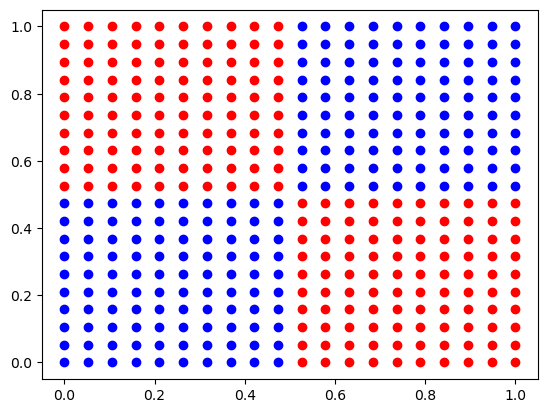

In [3]:
color=['blue', 'red']
for lbl in np.unique(y):
    plt.scatter(X[y==lbl][:,0], X[y==lbl][:,1], c=color[lbl])

In [4]:
## Importación de la clase del perceptrón multicapa
from sklearn.neural_network import MLPClassifier
## Inicialización y creación del objeto clasificador
mlp = MLPClassifier(max_iter=200,activation = 'tanh',solver='lbfgs',random_state=1, hidden_layer_sizes=(4,2)) 
mlp.fit(X, y)
print("Exactitud del conjunto de entrenamiento: {:.3f}".format(mlp.score(X, y)))

Exactitud del conjunto de entrenamiento: 1.000


In [11]:
mlp.n_features_in_, mlp.hidden_layer_sizes, mlp.n_outputs_, "Total de capas=", mlp.n_layers_

(2, (4, 2), 1, 'Total de capas=', 4)

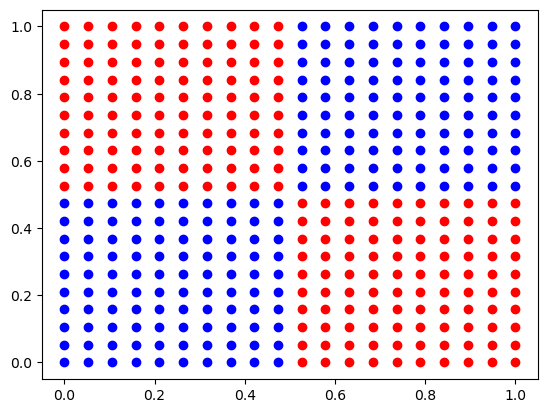

In [12]:
color=['blue', 'red']
y_pred = mlp.predict(X)
for lbl in np.unique(y_pred):
    plt.scatter(X[y_pred==lbl][:,0], X[y_pred==lbl][:,1], c=color[lbl])

__Uso del Perceptron Bicapa__

No puede realizar la clasificación por no ser separable linealmente

In [15]:
from sklearn.linear_model import Perceptron
blp = Perceptron(tol=None, max_iter=3000, alpha=0.01, random_state=1)
blp.fit(X,y)

Perceptron(alpha=0.01, max_iter=3000, random_state=1, tol=None)

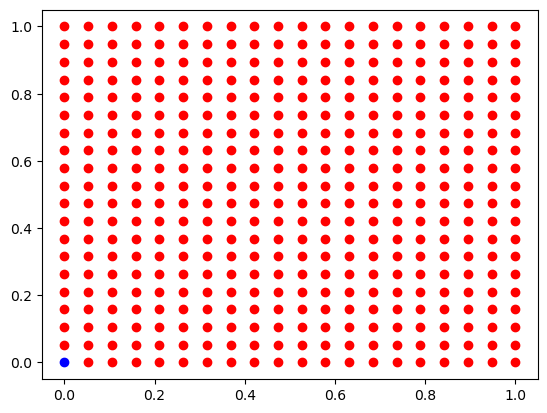

In [16]:
color=['blue', 'red']
y_pred = blp.predict(X)
for lbl in np.unique(y_pred):
    plt.scatter(X[y_pred==lbl][:,0], X[y_pred==lbl][:,1], c=color[lbl])

## Clasificar con el Perceptron Multicapa el conjunto de cifras manuscritas de MNIST

El conjunto __MNIST__ (por sus siglas en inglés, Modified National Institute of Standards and Technology database) contiene una base de datos de __cifras manuscritas__ (del 0 al 9) tomadas de los empleados de la Oficina del Censo. Está formada por 60.000 registros de entrenamiento y 10.000 de pruebas. 

Se descargan los datos de __torchvision.datasets__ por lo que se transforman de tensor pytorch a array numpy.

In [73]:
import torch
from torchvision import datasets, transforms
import torchvision.transforms.functional as fn

# Download and load the test data
w_dataset = datasets.MNIST('data', download=True, train=False, transform=transforms.ToTensor())
dataResized = fn.resize(w_dataset.data, 32,antialias=True)
dataCifar = dataResized.data.numpy()
dataCifar.shape

(10000, 32, 32)

__Se toman 2000 y 100 registros del total para el conjunto de entrenamiento y validación__

__Se cambia la doble dimensión 32x32 aplanando con la función reshape()__

In [74]:
nTrain = 2000
nTest = 100
X_train = np.empty((nTrain, dataCifar.shape[1] * dataCifar.shape[2]), dtype=np.float32)
y_train = [] ## Se crea el array de labels
for i in range(nTrain):
    _x, t = w_dataset.__getitem__(i)
    y_train.append(t)
    X_train[i] = dataCifar[i].reshape((dataCifar.shape[1]*dataCifar.shape[2]))

X_test = np.empty((nTest, dataCifar.shape[1] * dataCifar.shape[2]), dtype=np.float32)
y_test = [] ## Se crea el array de labels
for i in range(nTest):
    _x, t = w_dataset.__getitem__(nTrain+i)
    y_test.append(t)
    X_test[i] = dataCifar[nTrain+i].reshape((dataCifar.shape[1]*dataCifar.shape[2]))
X_train.shape, X_test.shape

((2000, 1024), (100, 1024))

__Aspecto de los elementos del conjunto__

In [82]:
def plotCifar(Star, Img, lbl):
    fig, axs = plt.subplots(1, 16, figsize=(12,5))
    for i in range(16):
        axs[i].imshow(dataCifar[Star+i])
        axs[i].set_title(lbl[i])

        for ax in fig.get_axes():
            ax.label_outer()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

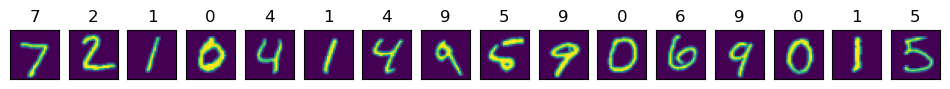

In [83]:
plotCifar(0, dataCifar, y_train)

__Se entrena usando MLPClassifier y el conjunto de entrenamiento__

In [69]:
mlp = MLPClassifier(max_iter=200,activation = 'relu',solver='adam',random_state=1, hidden_layer_sizes=(500,100)) 
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(500, 100), random_state=1)

In [78]:
y_pred = mlp.predict(X_train)
"Porcentaje de acierto en el conjunto de entrenamiento=", 100*mlp.score(X_train, y_train)

('Porcentaje de acierto en el conjunto de entrenamiento=', 100.0)

__Verificación del resultado en el conjunto de__ 

Se puede comprobar alguno de los errores cometidos en predicción

In [85]:
y_pred = mlp.predict(X_test)
"Porcentaje de acierto en el conjunto de pruebas=", 100*mlp.score(X_test, y_test)

('Porcentaje de acierto en el conjunto de pruebas=', 91.0)

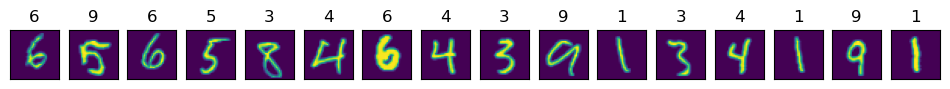

In [86]:
plotCifar(2000, dataCifar, y_pred)

## Estructura tridimensional de proteinas (AlphaFold)

- {cite:p}`senior2019protein`.

El procedimiento seguido ha resultado __paradigmático__ en este tipo de metodologías:

<img src="images/alphafold.png" width="600px">

Es posible acceder a un cuaderno Jupyter en Google Colaboratory donde predecir en la red AlphaFold creandose una copia del cuaderno en el Drive de cada usuario desde el enlace:

<a href="https://colab.sandbox.google.com/github/deepmind/alphafold/blob/main/notebooks/AlphaFold.ipynb">https://colab.sandbox.google.com/github/deepmind/alphafold/blob/main/notebooks/AlphaFold.ipynb</a>

## Artículos para profundizar

- <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3507700/#B15">https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3507700/#B15</a>
- <a href="http://science.sciencemag.org/content/313/5786/504">http://science.sciencemag.org/content/313/5786/504</a>
- <a href="https://www.tandfonline.com/doi/full/10.1080/13102818.2017.1364977">https://www.tandfonline.com/doi/full/10.1080/13102818.2017.1364977</a>
- {cite:p}`jain1996artificial`
- {cite:p}`krogh2008artificial`
- {cite:p}`wang2020tdefsi`